In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
train_df = pd.read_csv("Titanic_train.csv")
test_df = pd.read_csv("Titanic_test.csv")

In [2]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# Combine for EDA and preprocessing
combined_df = pd.concat([train_df.drop('Survived', axis=1), test_df], ignore_index=True)
combined_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
print("Training Data Info:")
train_df.info()

print("=====================================================")

print("\nTest Data Info:")
test_df.info()

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Test Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  

In [6]:
print("\nMissing Values in Combined Data:")
print(combined_df.isnull().sum())


Missing Values in Combined Data:
PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64


In [7]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


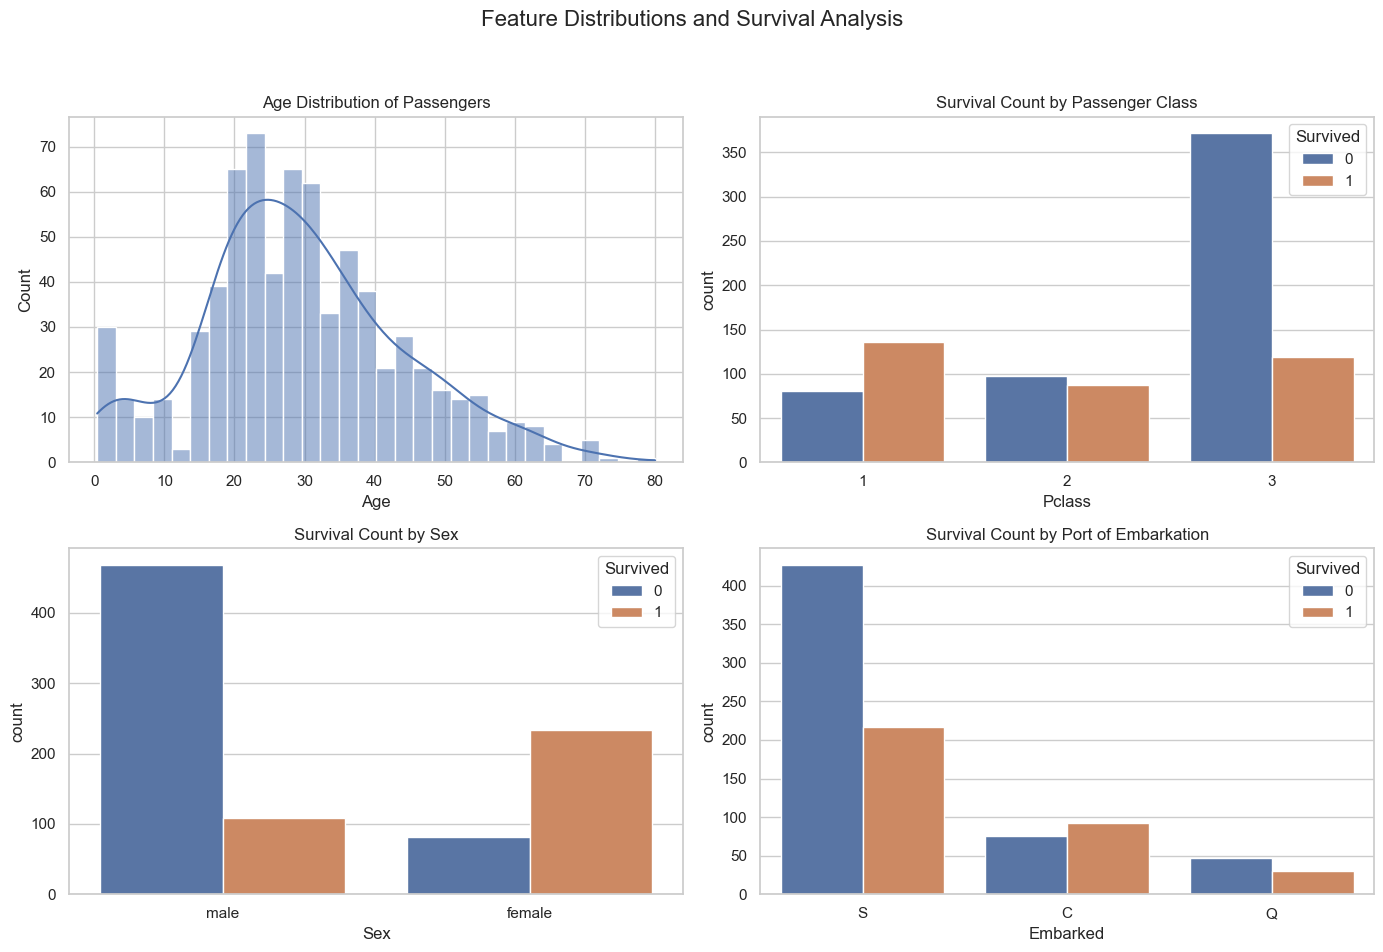

In [8]:
1# Set up the plotting style
sns.set(style='whitegrid')

# Create a figure for the plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Feature Distributions and Survival Analysis', fontsize=16)

# Plot 1: Age Distribution
sns.histplot(train_df['Age'].dropna(), kde=True, ax=axes[0, 0], bins=30)
axes[0, 0].set_title('Age Distribution of Passengers')

# Plot 2: Pclass vs. Survival
sns.countplot(data=train_df, x='Pclass', hue='Survived', ax=axes[0, 1])
axes[0, 1].set_title('Survival Count by Passenger Class')

# Plot 3: Sex vs. Survival
sns.countplot(data=train_df, x='Sex', hue='Survived', ax=axes[1, 0])
axes[1, 0].set_title('Survival Count by Sex')

# Plot 4: Embarked vs. Survival
sns.countplot(data=train_df, x='Embarked', hue='Survived', ax=axes[1, 1])
axes[1, 1].set_title('Survival Count by Port of Embarkation')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# The visualizations provide some key insights:

1. Age: The passenger age distribution is skewed towards younger individuals, with a significant number of passengers in their 20s and 30s.
2. Passenger Class: First-class passengers had a higher survival rate compared to those in second and third class. Third-class passengers had the lowest survival rate.
3. Sex: Females had a significantly higher survival rate than males.
4. Port of Embarkation: Passengers who embarked at Cherbourg (C) appear to have a higher survival rate than those from Southampton (S) and Queenstown (Q).

In [9]:
combined_df['Age'] = combined_df['Age'].fillna(combined_df['Age'].median())
combined_df['Fare'] = combined_df['Fare'].fillna(combined_df['Fare'].median())
combined_df['Embarked'] = combined_df['Embarked'].fillna(combined_df['Embarked'].mode()[0])

In [10]:
# Feature Engineering
# Extract titles from names using raw string to avoid escape sequence warning
combined_df['Title'] = combined_df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

# Replace less common titles with 'Rare'
combined_df['Title'] = combined_df['Title'].replace(
    ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

# Standardize some titles
combined_df['Title'] = combined_df['Title'].replace('Mlle', 'Miss')
combined_df['Title'] = combined_df['Title'].replace('Ms', 'Miss')
combined_df['Title'] = combined_df['Title'].replace('Mme', 'Mrs')


In [11]:
# Create FamilySize feature
combined_df['FamilySize'] = combined_df['SibSp'] + combined_df['Parch'] + 1
combined_df['FamilySize'].head()

0    2
1    2
2    1
3    2
4    1
Name: FamilySize, dtype: int64

In [12]:
# Encode categorical variables
combined_df = pd.get_dummies(combined_df, columns=['Sex', 'Embarked', 'Title'], drop_first=True)
combined_df.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilySize,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,1,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,2,True,False,True,False,True,False,False
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,2,False,False,False,False,False,True,False
2,3,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,False,False,True,True,False,False,False
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,2,False,False,True,False,False,True,False
4,5,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,True,False,True,False,True,False,False


In [13]:
combined_df.shape

(1309, 17)

In [14]:
# Drop unnecessary columns
combined_df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)

In [15]:
# Separate back into training and test sets
train_processed = combined_df.iloc[:len(train_df)]
test_processed = combined_df.iloc[len(train_df):]

X = train_processed
y = train_df['Survived']

print("Processed Training Data Head:")
X.head()

Processed Training Data Head:


,Pclass,Age,SibSp,Parch,Fare,FamilySize,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,3,22.0,1,0,7.2500,2,True,False,True,False,True,False,False
1,1,38.0,1,0,71.2833,2,False,False,False,False,False,True,False
2,3,26.0,0,0,7.9250,1,False,False,True,True,False,False,False
3,1,35.0,1,0,53.1000,2,False,False,True,False,False,True,False
4,3,35.0,0,0,8.0500,1,True,False,True,False,True,False,False


In [16]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import lightgbm as lgb
import xgboost as xgb

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# --- LightGBM ---
lgbm = lgb.LGBMClassifier(random_state=42)
param_grid_lgbm = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'num_leaves': [31, 50]
}
grid_lgbm = GridSearchCV(lgbm, param_grid_lgbm, cv=5, scoring='accuracy')
grid_lgbm.fit(X_train, y_train)
best_lgbm = grid_lgbm.best_estimator_
y_pred_lgbm = best_lgbm.predict(X_test)

[LightGBM] [Info] Number of positive: 214, number of negative: 355
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001589 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 196
[LightGBM] [Info] Number of data points in the train set: 569, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376098 -> initscore=-0.506142
[LightGBM] [Info] Start training from score -0.506142
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [18]:
y_pred_lgbm

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [19]:
# --- XGBoost ---
xgboost = xgb.XGBClassifier(random_state=42, eval_metric='logloss')

param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}
grid_xgb = GridSearchCV(xgboost, param_grid_xgb, cv=5, scoring='accuracy')
grid_xgb.fit(X_train, y_train)
best_xgb = grid_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)

In [20]:
y_pred_xgb

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1])

In [21]:
# --- Evaluation ---
metrics_lgbm = {
    "Accuracy": accuracy_score(y_test, y_pred_lgbm),
    "Precision": precision_score(y_test, y_pred_lgbm),
    "Recall": recall_score(y_test, y_pred_lgbm),
    "F1-Score": f1_score(y_test, y_pred_lgbm)
}

In [22]:
print(metrics_lgbm)

{'Accuracy': 0.8268156424581006, 'Precision': 0.8028169014084507, 'Recall': 0.7702702702702703, 'F1-Score': 0.7862068965517242}


In [23]:
metrics_xgb = {
    "Accuracy": accuracy_score(y_test, y_pred_xgb),
    "Precision": precision_score(y_test, y_pred_xgb),
    "Recall": recall_score(y_test, y_pred_xgb),
    "F1-Score": f1_score(y_test, y_pred_xgb)
}

In [24]:
print(metrics_xgb)

{'Accuracy': 0.8100558659217877, 'Precision': 0.803030303030303, 'Recall': 0.7162162162162162, 'F1-Score': 0.7571428571428571}


In [25]:
# Create a DataFrame for comparison
comparison_df = pd.DataFrame({'LightGBM': metrics_lgbm, 'XGBoost': metrics_xgb})
print(comparison_df)

           LightGBM   XGBoost
Accuracy   0.826816  0.810056
Precision  0.802817  0.803030
Recall     0.770270  0.716216
F1-Score   0.786207  0.757143


In [26]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import pandas as pd

# Assuming X and y are already defined from the preprocessing step

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Scikit-learn Gradient Boosting ---
gbm = GradientBoostingClassifier(random_state=42)
param_grid_gbm = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}
grid_gbm = GridSearchCV(gbm, param_grid_gbm, cv=5, scoring='accuracy')
grid_gbm.fit(X_train, y_train)
best_gbm = grid_gbm.best_estimator_
y_pred_gbm = best_gbm.predict(X_test)



# --- Evaluation ---
metrics_gbm = {
    "Accuracy": accuracy_score(y_test, y_pred_gbm),
    "Precision": precision_score(y_test, y_pred_gbm),
    "Recall": recall_score(y_test, y_pred_gbm),
    "F1-Score": f1_score(y_test, y_pred_gbm)
}


# Create a DataFrame for comparison
comparison_df = pd.DataFrame({'GradientBoosting': metrics_gbm, 'XGBoost': metrics_xgb})
print("Model Performance Comparison:")
print(comparison_df)

Model Performance Comparison:
           GradientBoosting   XGBoost
Accuracy           0.826816  0.810056
Precision          0.802817  0.803030
Recall             0.770270  0.716216
F1-Score           0.786207  0.757143


In [27]:
from sklearn.ensemble import RandomForestClassifier
# --- Random Forest ---
rf = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5]
}
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

In [28]:
y_pred_rf

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [29]:
metrics_rf = {
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "Precision": precision_score(y_test, y_pred_rf),
    "Recall": recall_score(y_test, y_pred_rf),
    "F1-Score": f1_score(y_test, y_pred_rf)
}

In [30]:
metrics_rf

{'Accuracy': 0.8100558659217877,
 'Precision': 0.803030303030303,
 'Recall': 0.7162162162162162,
 'F1-Score': 0.7571428571428571}

In [31]:
# Create a DataFrame for comparison and plot it
comparison_df = pd.DataFrame({'GradientBoosting': metrics_gbm, 'RandomForest': metrics_rf})
print("Model Performance Comparison:")
print(comparison_df)

Model Performance Comparison:
           GradientBoosting  RandomForest
Accuracy           0.826816      0.810056
Precision          0.802817      0.803030
Recall             0.770270      0.716216
F1-Score           0.786207      0.757143


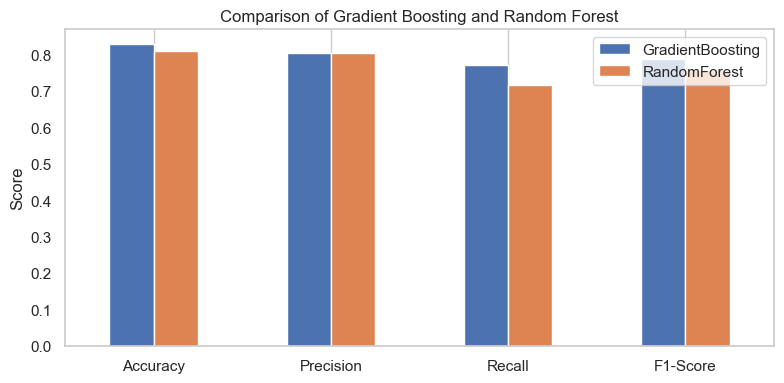

In [32]:
# Plotting the comparison
comparison_df.plot(kind='bar', figsize=(8, 4))
plt.title('Comparison of Gradient Boosting and Random Forest')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
#plt.savefig('model_comparison.png')
plt.show()